# 🎬 Movie Rating Prediction Project

# 📜 Overview

The objective of this project is to forecast movie scores based on a number of criteria, including Genre, Director, Lead Actor, and Year of Release. This research investigates data analysis, preprocessing, feature engineering, and machine learning modeling techniques through the examination of historical movie data in order to create a model that reliably predicts user or critic ratings for films.
 

# 📊 Data Analysis and Exploration

In order to understand the elements impacting movie ratings, the study starts with a detailed exploration of the dataset:

1.Data Visualization: To comprehend the distribution of ratings and the correlations between attributes, correlation matrices, bar graphs, and histograms were employed.

2.Important Takeaways: The investigation stage revealed which categories often have greater ratings, how ratings have evolved over time, and how directors and star actors affect ratings.


# 🛠️ Data Preprocessing

Multiple preprocessing processes were performed in order to get the data ready for modeling:

* Managing Missing Values: When there were missing values, they were either filled in with the proper values (such as the ratings median) or, if necessary, rows or columns were removed.

* Encoding Categorical Variables: To transform categorical information into a numerical format that is appropriate for machine learning models, methods like Label Encoding were used to encode them. Examples of these features are Actor, Director, and Genre.


* Feature Scaling: Made sure that the numerical features were scaled correctly, particularly when employing models that depend on the input feature scale.


# 🧠 Feature Engineering

In feature engineering, new features were added or current features were changed in order to enhance model performance:

* Interaction Features: To capture more intricate correlations between the current features, polynomial and interaction features were introduced.

* Time-Based Features: To account for any time-related effects on ratings, a feature that shows the number of years after the film's release was added.


# 🧮 Model Building

To forecast movie ratings, a number of regression models were developed:

* Linear Regression: A simple baseline model for determining the linear connection between features and the target variable.
* Random Forest Regressor: A more advanced model that captures nonlinear relationships and feature interactions.
* Assessment of the Model: Metrics like R-squared (R²) and Mean Squared Error (MSE) were used to assess the models. Plots such as scatter plots of actual vs. projected ratings, residual plots, and Q-Q plots were used to visualize the performance of the models.


# 📈 Model Evaluation and Visualization

The performance of the model was assessed and diagnosed using a variety of plots:

* Residual Plots: Assisted in identifying possible areas where the model may be enhanced by looking for patterns in the mistakes.
* Q-Q Plots: Verified that the model's presumptions were met by evaluating the residuals' normality.
* Hexbin and KDE Plots: Showcased regions of high density or outliers and gave a sharper picture of the distribution of actual ratings compared to anticipated ratings.


# IMPORT LIBRARIES

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


from plotly.offline import init_notebook_mode, iplot, plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


# Import dataset

In [4]:
movie = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\online projects dataset\IMDb Movies India.csv", encoding = 'latin1')
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
movie.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


# PERFORM BASIC DATA QUALITY CHECK

In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
movie.shape

(15509, 10)

In [8]:
movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [9]:
movie.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
movie.duplicated().sum()

6

There are missing values and duplicated rows in the dataset

In [11]:
#drop the duplicated rows
movie.drop_duplicates(inplace=True)
movie.duplicated().sum()

0

CHANGING ["Duration","Year","Votes"] TO NUMERIC TYPE

In [12]:
movie["Year"].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [13]:
movie["Duration"].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [14]:
movie['Votes'].unique

<bound method Series.unique of 0        NaN
1          8
2        NaN
3         35
4        NaN
        ... 
15504     11
15505    655
15506    NaN
15507    NaN
15508     20
Name: Votes, Length: 15503, dtype: object>

convert string to float

In [15]:
movie["Duration"]=movie["Duration"].str.replace(" min","").astype(float)
movie["Duration"].head()

0      NaN
1    109.0
2     90.0
3    110.0
4    105.0
Name: Duration, dtype: float64

In [16]:
movie["Year"]=movie["Year"].str.strip("()").astype(float)
movie["Year"].head()

0       NaN
1    2019.0
2    2021.0
3    2019.0
4    2010.0
Name: Year, dtype: float64

In [17]:
movie["Votes"]=movie["Votes"].str.replace(",","")

In [18]:
movie["Votes"]=movie["Votes"].str.replace("$5.16M","516",regex=False)

In [19]:
movie["Votes"]=movie["Votes"].astype(float)
movie["Votes"].head()

0     NaN
1     8.0
2     NaN
3    35.0
4     NaN
Name: Votes, dtype: float64

# DATA PREPROCESSING

Identify & Handling missing values

In [20]:
# check for missing values in each column
missing_values = movie.isnull().sum()

#display the columns with missing values and the count of missing values
print(missing_values[missing_values > 0])

Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64


In [21]:
# Fill missing numerical values with the mean of the column
movie["Duration"].fillna(movie["Duration"].median(), inplace=True)


In [22]:
movie["Rating"].fillna(movie["Rating"].mean(),inplace=True)

In [23]:
movie["Votes"].fillna(movie["Votes"].median(),inplace=True)

In [24]:
movie.dropna(subset=["Genre","Actor 1","Year","Director","Actor 2","Actor 3"],inplace=True)

Check for missing values again

In [25]:
movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [26]:
movie.shape

(11085, 10)

In [27]:
movie.nunique()

Name        10178
Year           94
Duration      178
Genre         448
Rating         85
Votes        2031
Director     4530
Actor 1      3764
Actor 2      4175
Actor 3      4398
dtype: int64

In [28]:
movie["Genre"]=movie["Genre"].str.split(",").explode("Genre").reset_index(drop=True)

In [29]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,Musical,5.841621,55.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,Comedy,4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Romance,5.841621,55.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997.0,147.0,Drama,4.700000,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


# DATA VISUALIZATION

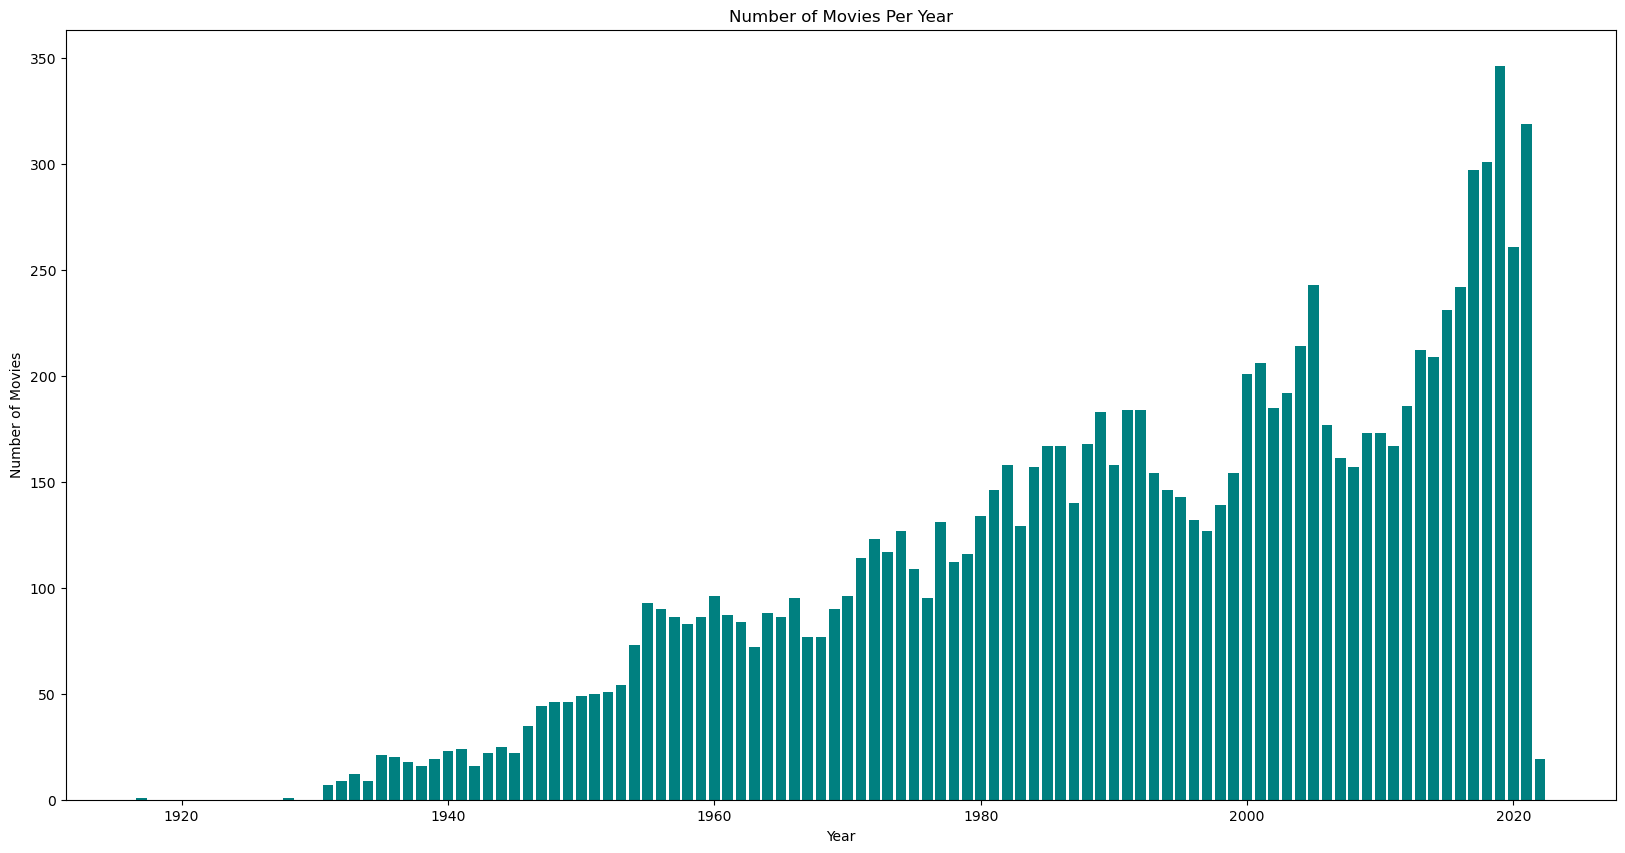

In [47]:
import matplotlib.pyplot as plt

# Prepare data for the bar plot
year_counts = movie['Year'].value_counts().sort_index()

plt.figure(figsize=(20, 10))

# Create a bar plot
plt.bar(year_counts.index, year_counts.values, color='teal')

# Add labels and title
plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Show the plot
plt.show()

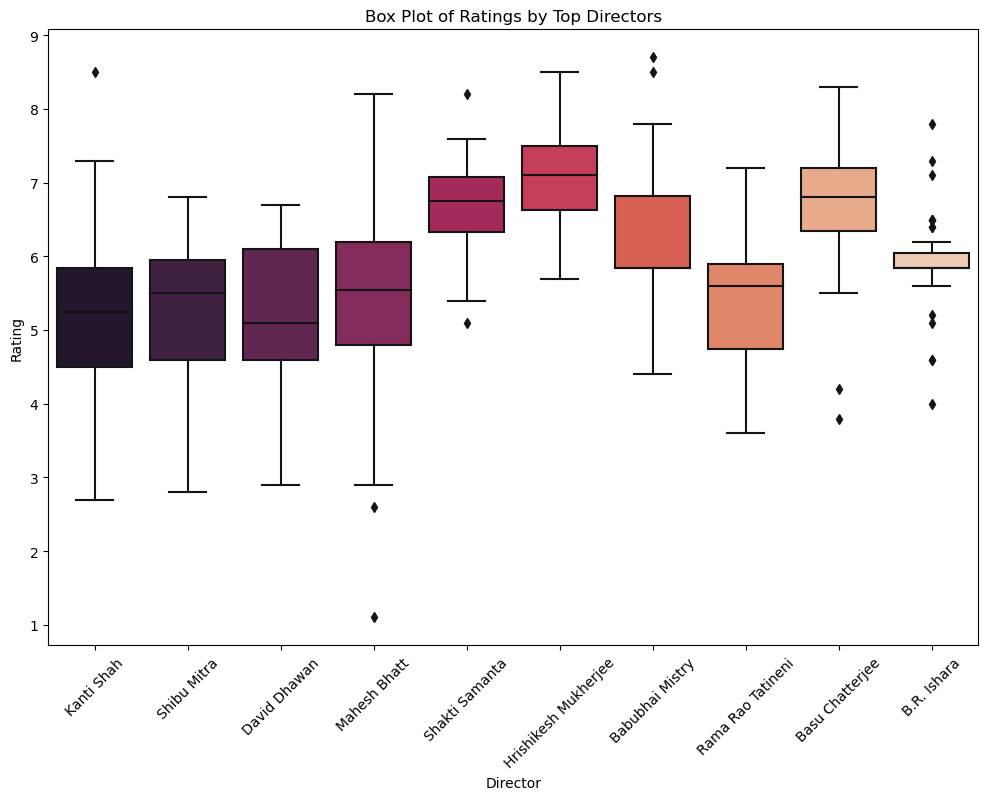

In [38]:
plt.figure(figsize=(12, 8))
TopDirectors=movie['Director'].value_counts().index[0:10]
sns.boxplot(data=movie[movie['Director'].isin(TopDirectors)], x='Director', y='Rating', palette='rocket')

plt.title('Box Plot of Ratings by Top Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

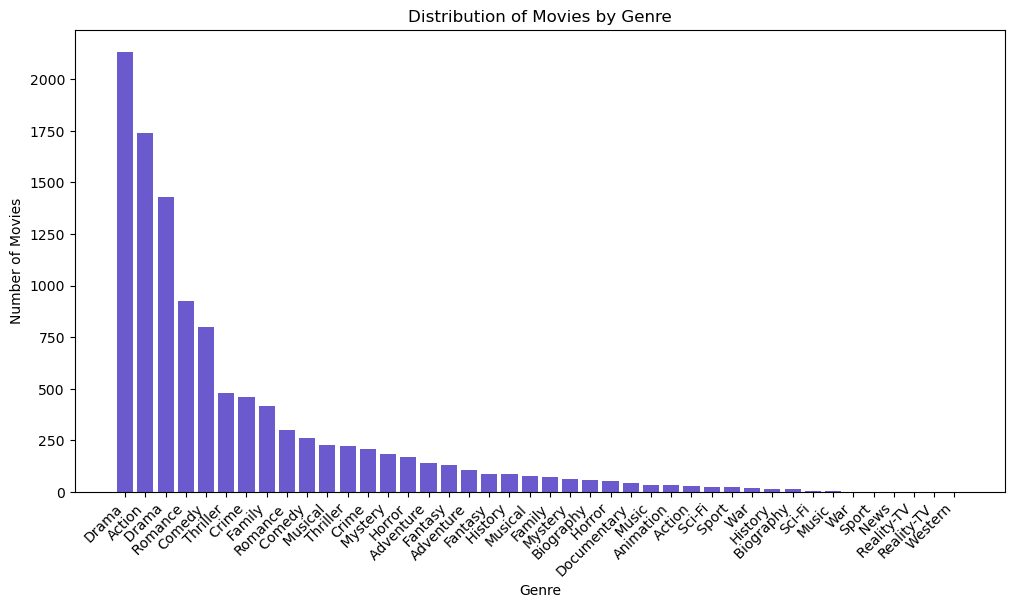

In [96]:
import matplotlib.pyplot as plt

# Calculate the value counts for each genre
genre_counts = movie["Genre"].value_counts()

# Plot a bar chart for genre distribution
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values, color='slateblue')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Genre')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

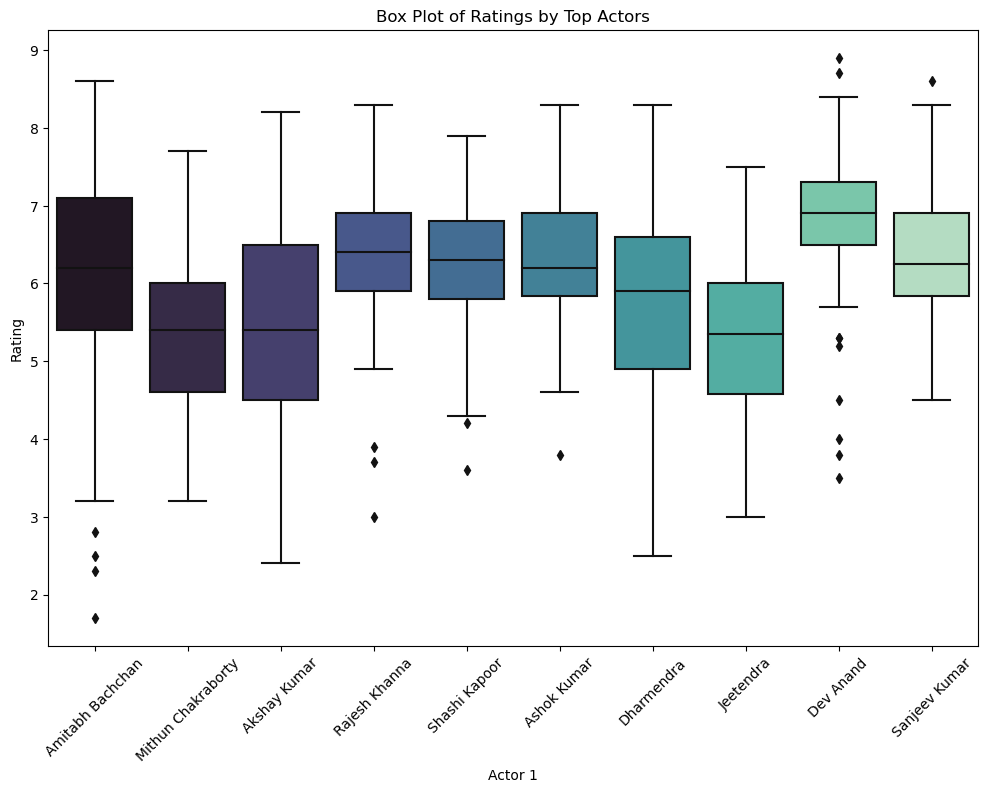

In [65]:
plt.figure(figsize=(12, 8))
TopActors = movie['Actor 1'].value_counts().index[:10]
sns.boxplot(data=movie[movie['Actor 1'].isin(TopActors)], x='Actor 1', y='Rating', palette='mako')

plt.title('Box Plot of Ratings by Top Actors')
plt.xlabel('Actor 1')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

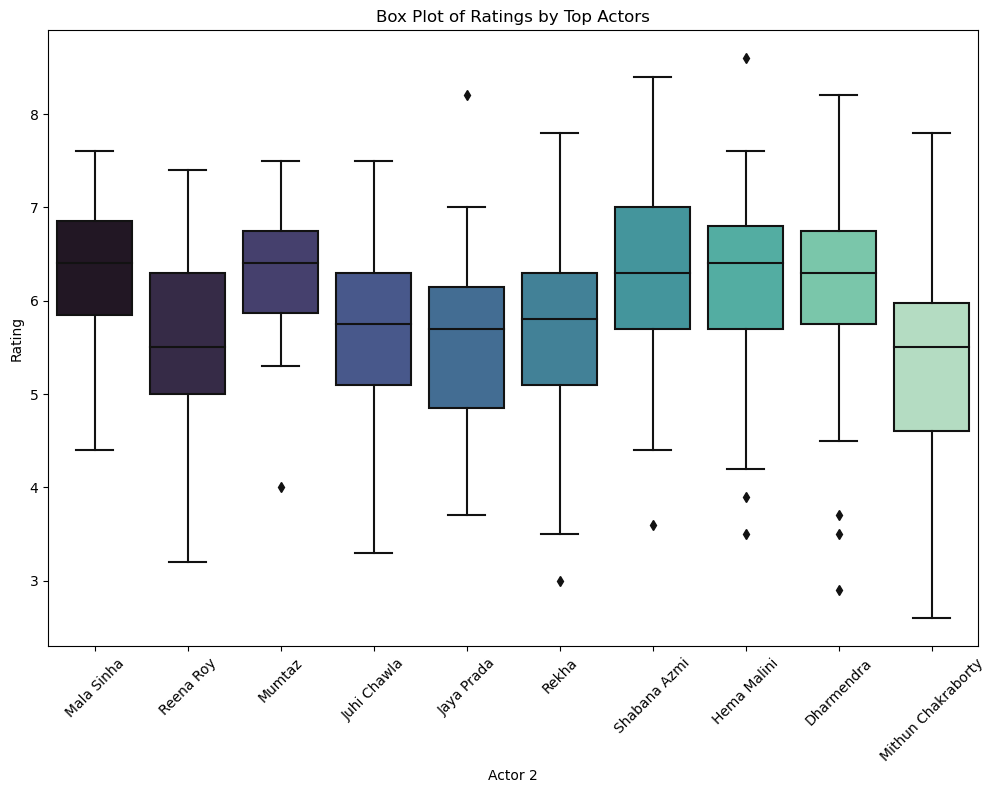

In [62]:
plt.figure(figsize=(12, 8))
TopActors = movie['Actor 2'].value_counts().index[:10]
sns.boxplot(data=movie[movie['Actor 2'].isin(TopActors)], x='Actor 2', y='Rating', palette='mako')

plt.title('Box Plot of Ratings by Top Actors')
plt.xlabel('Actor 2')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

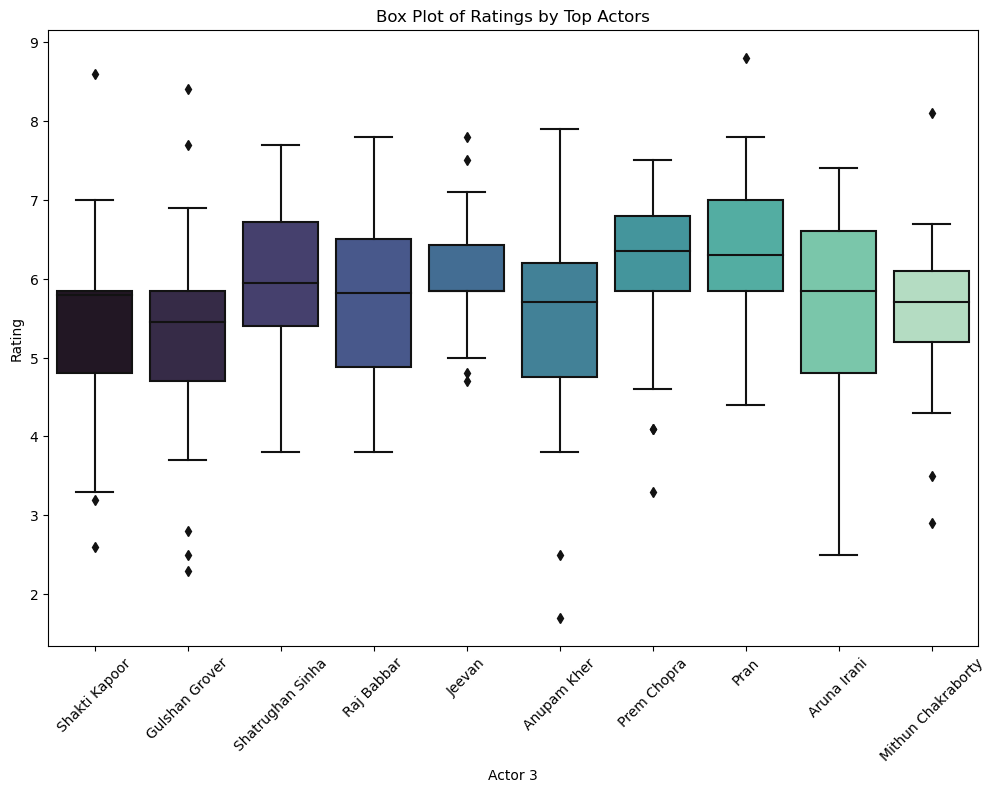

In [63]:
plt.figure(figsize=(12, 8))
TopActors = movie['Actor 3'].value_counts().index[:10]
sns.boxplot(data=movie[movie['Actor 3'].isin(TopActors)], x='Actor 3', y='Rating', palette='mako')

plt.title('Box Plot of Ratings by Top Actors')
plt.xlabel('Actor 3')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

Average Ratings by Actor 1, Genre, Director, and Year

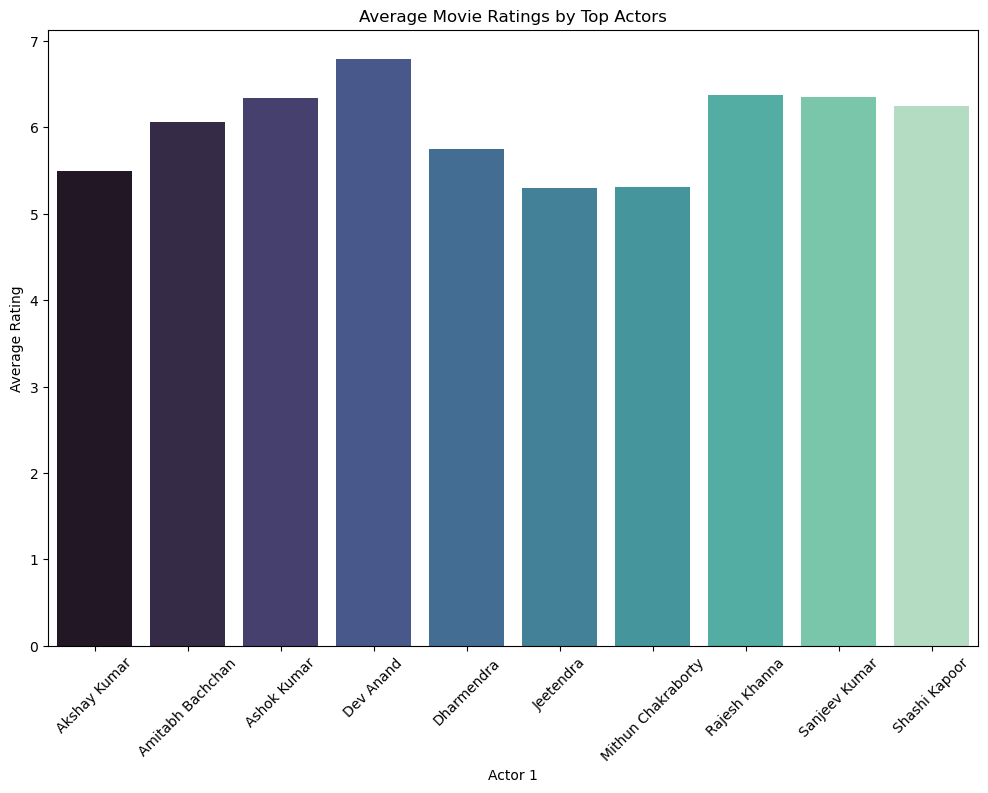

In [49]:
import seaborn as sns

# Calculate the average rating for each top actor
average_ratings = movie[movie['Actor 1'].isin(TopActors)].groupby('Actor 1')['Rating'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=average_ratings.index, y=average_ratings.values, palette='mako')

plt.title('Average Movie Ratings by Top Actors')
plt.xlabel('Actor 1')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


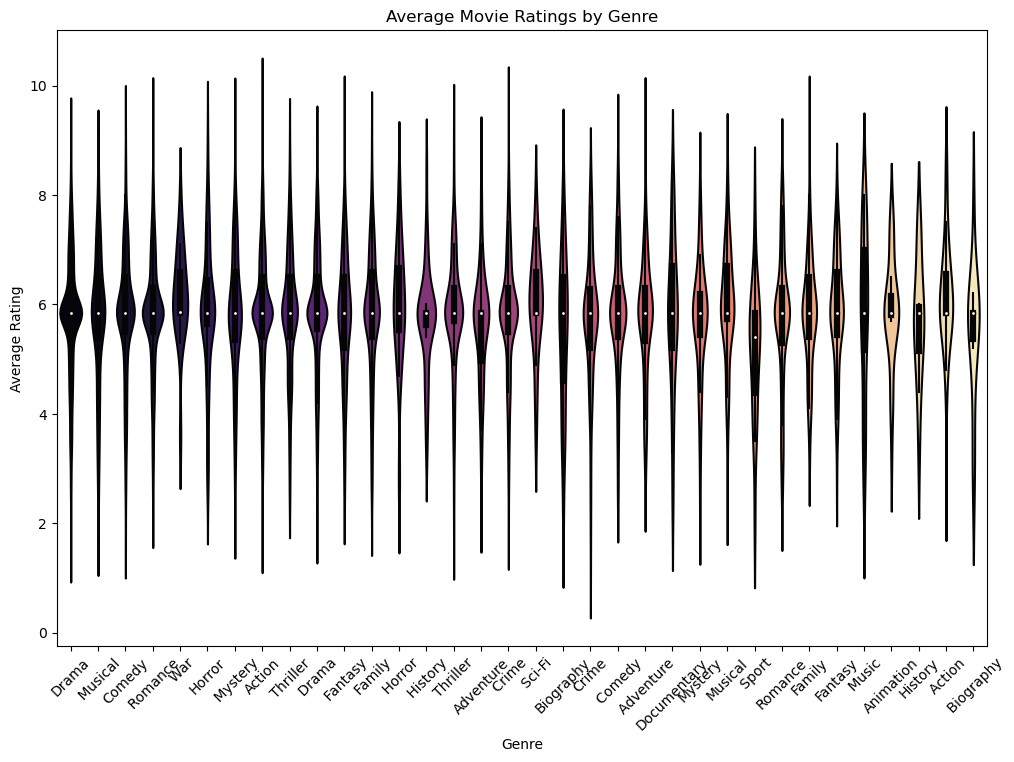

In [71]:
# Calculate average rating by genre
genre_rating = movie['Genre'].value_counts()[movie['Genre'].value_counts() > 10].index

plt.figure(figsize=(12, 8))

sns.violinplot(data=movie[movie['Genre'].isin(genre_rating)], x='Genre', y='Rating', palette='magma')

plt.title('Average Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


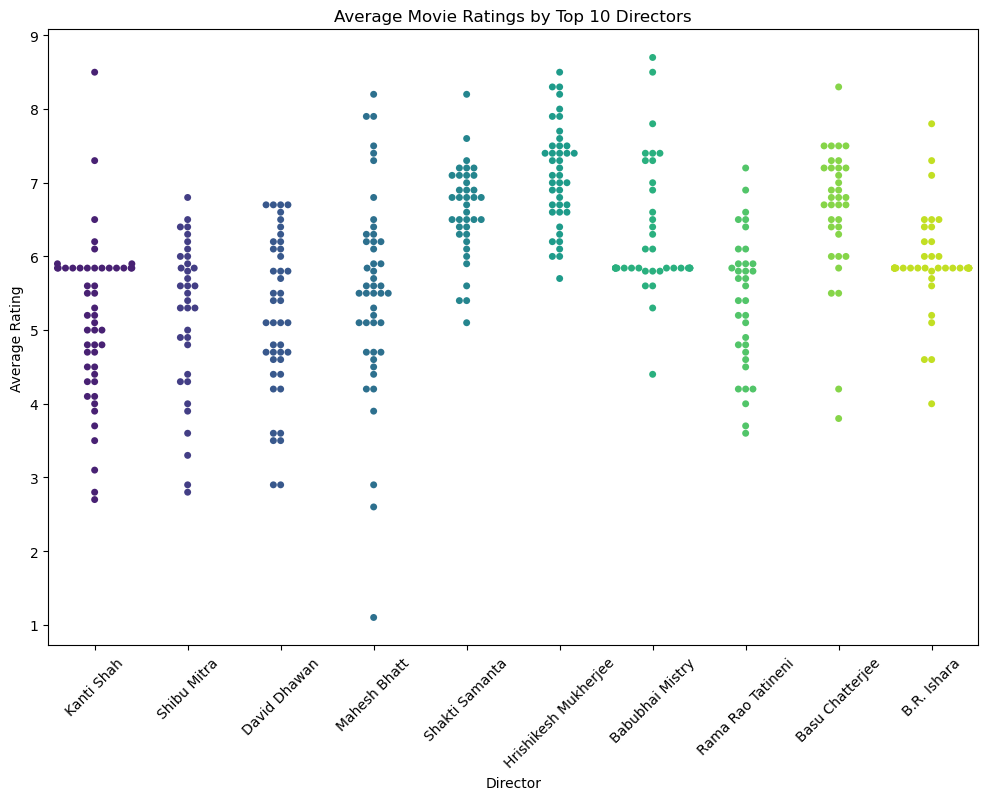

In [72]:
# Calculate average rating by director
director_rating = movie['Director'].value_counts().index[:10]

plt.figure(figsize=(12, 8))

sns.swarmplot(x='Director', y='Rating', data=movie[movie['Director'].isin(director_rating)], palette='viridis')

plt.title('Average Movie Ratings by Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

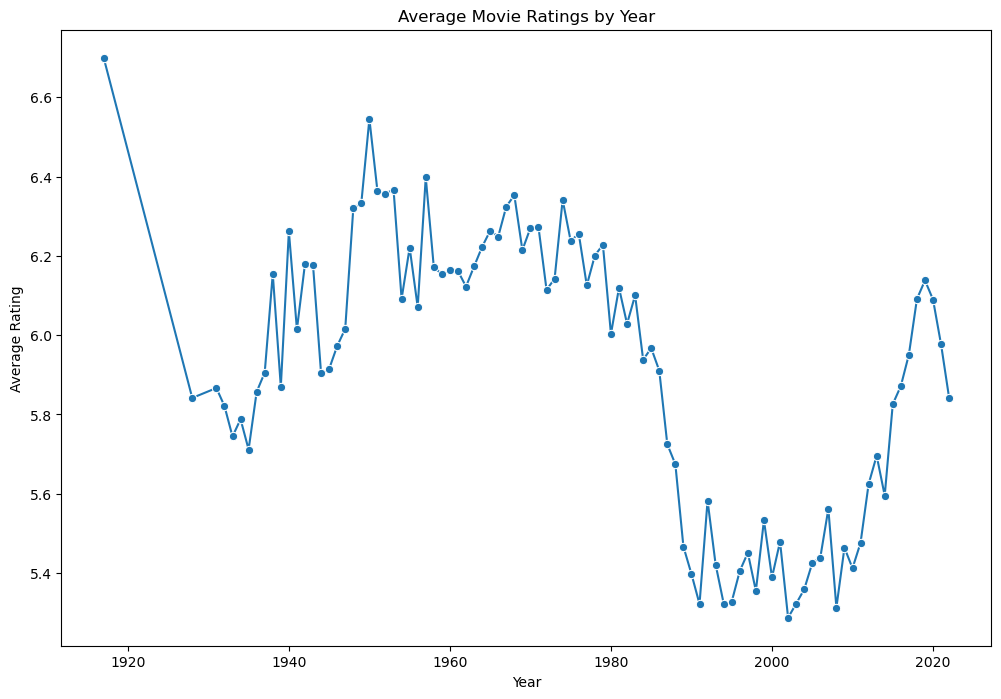

In [57]:
# Calculate average rating by year
year_rating = movie.groupby('Year')['Rating'].mean()

plt.figure(figsize=(12, 8))
sns.lineplot(x=year_rating.index, y=year_rating.values, marker='o')
plt.title('Average Movie Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

<Figure size 1400x800 with 0 Axes>

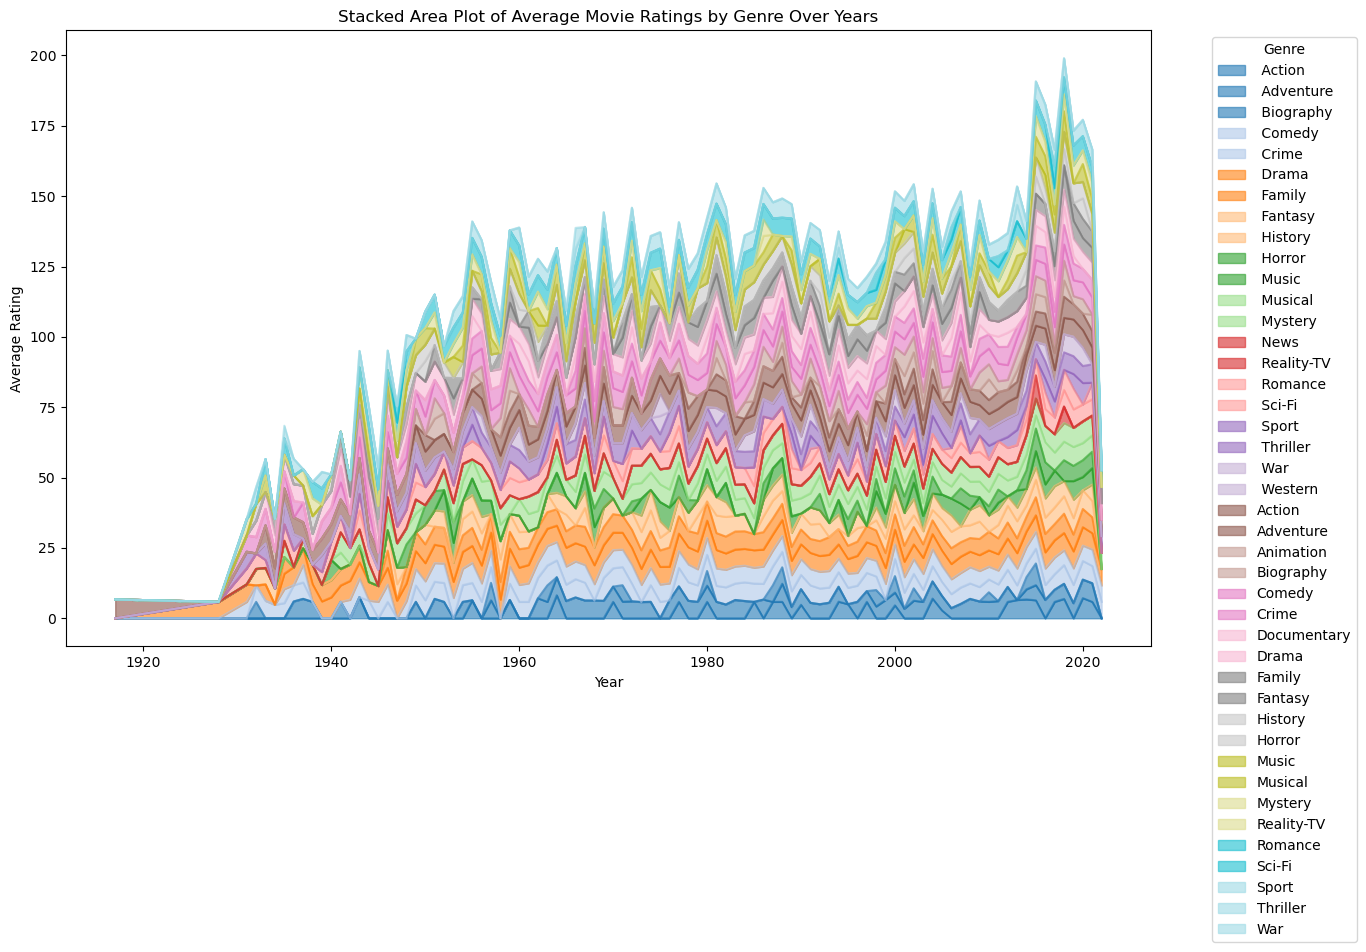

In [80]:
import matplotlib.pyplot as plt

# Group by 'Year' and 'Genre' and calculate the mean rating
avg_ratings_by_genre_year = movie.groupby(['Year', 'Genre'])['Rating'].mean().unstack()

plt.figure(figsize=(14, 8))

# Stacked area plot
avg_ratings_by_genre_year.plot.area(alpha=0.6, stacked=True, figsize=(14, 8), cmap='tab20')

# Add titles and labels
plt.title('Stacked Area Plot of Average Movie Ratings by Genre Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

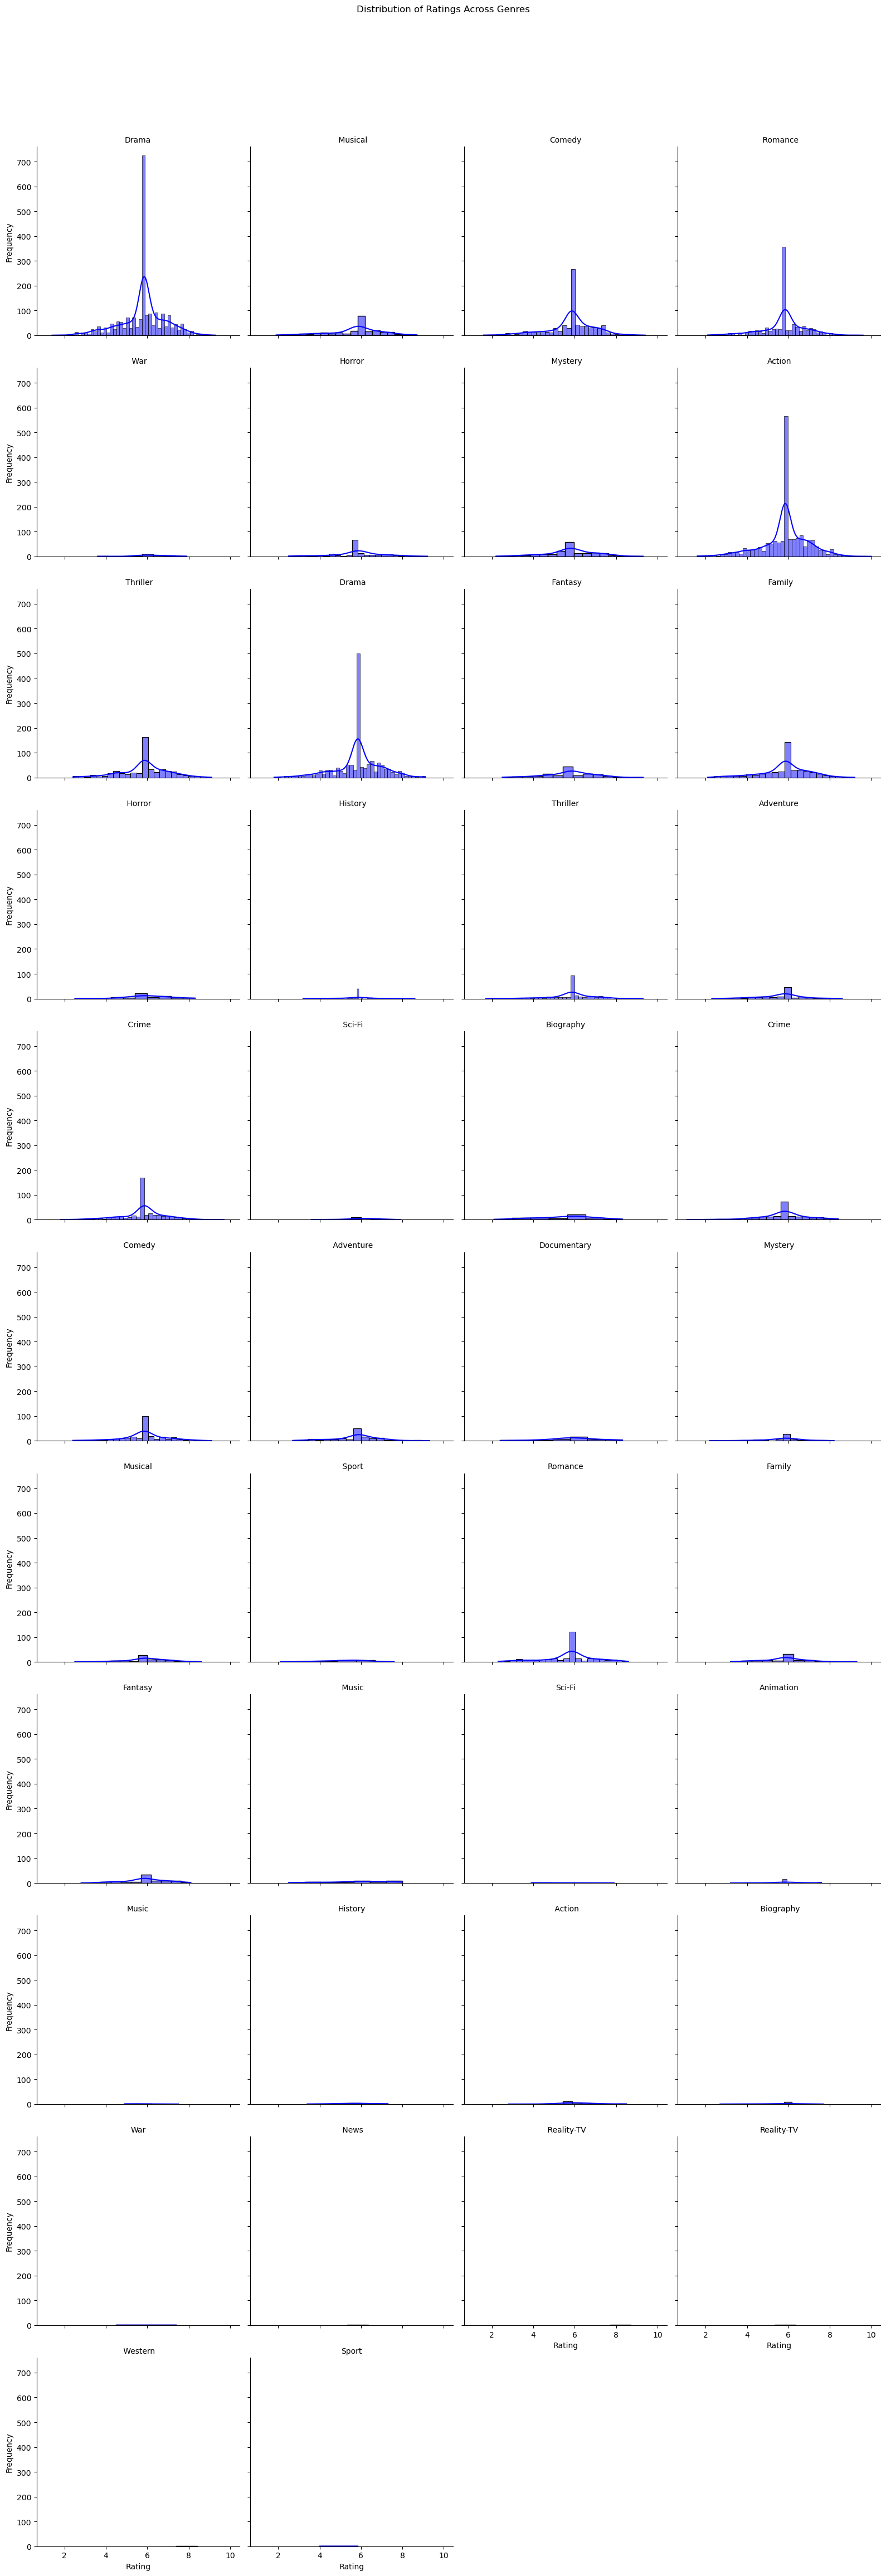

In [74]:
g = sns.FacetGrid(movie, col="Genre", col_wrap=4, height=4)
g.map(sns.histplot, "Rating", kde=True, color="blue")

g.set_titles("{col_name}")
g.set_axis_labels("Rating", "Frequency")
g.fig.suptitle('Distribution of Ratings Across Genres', y=1.05)

plt.show()

Building a Regression Model to Predict Movie Ratings

# FEATURE ENGINEERING

In [108]:
# Manually create interaction features
movie['Genre_Director'] = movie['Genre_encoded'] * movie['Director_encoded']
movie['Genre_Actor'] = movie['Genre_encoded'] * movie['Actor_encoded']
movie['Director_Actor'] = movie['Director_encoded'] * movie['Actor_encoded']

# Include these interaction features with the original features
X = movie[['Genre_encoded', 'Director_encoded', 'Actor_encoded', 'Year', 'Genre_Director', 'Genre_Actor', 'Director_Actor']]
y = movie['Rating']

# Display the first few rows of the new DataFrame with interaction features
print(X.head())


   Genre_encoded  Director_encoded  Actor_encoded    Year  Genre_Director  \
1             28              1177           2638  2019.0           32956   
2             11              3897           2986  2021.0           42867   
3             25              2523           2346  2019.0           63075   
4             15               299           2504  2010.0            4485   
5             28              2901            742  1997.0           81228   

   Genre_Actor  Director_Actor  
1        73864         3104926  
2        32846        11636442  
3        58650         5918958  
4        37560          748696  
5        20776         2152542  


In [109]:
# Create the time-based feature
movie['Years_Since_Release'] = 2024 - movie['Year']

# Include this new feature in the feature set
X['Years_Since_Release'] = movie['Years_Since_Release']

# Display the first few rows with the new time-based feature
print(X.head())

   Genre_encoded  Director_encoded  Actor_encoded    Year  Genre_Director  \
1             28              1177           2638  2019.0           32956   
2             11              3897           2986  2021.0           42867   
3             25              2523           2346  2019.0           63075   
4             15               299           2504  2010.0            4485   
5             28              2901            742  1997.0           81228   

   Genre_Actor  Director_Actor  Years_Since_Release  
1        73864         3104926                  5.0  
2        32846        11636442                  3.0  
3        58650         5918958                  5.0  
4        37560          748696                 14.0  
5        20776         2152542                 27.0  


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.2270667150448054
R-squared: 0.014765569307763404


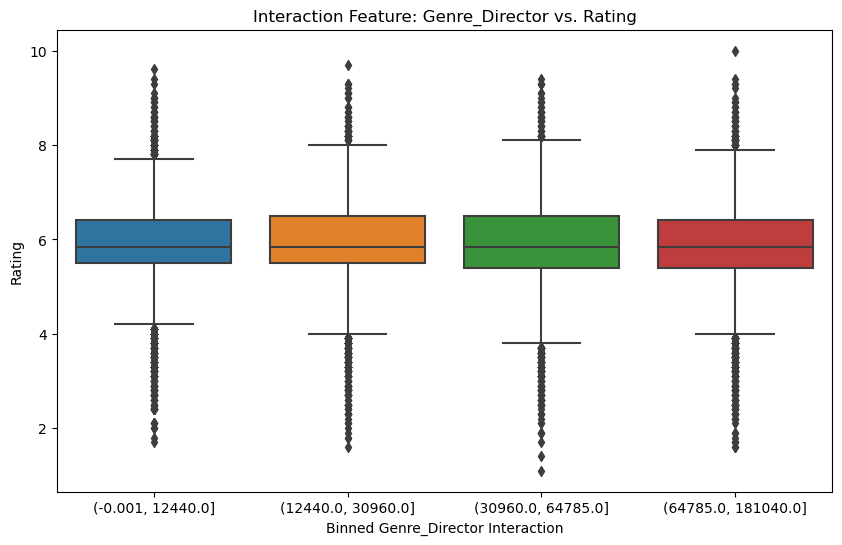

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert interaction feature to categorical if needed (e.g., binning)
movie['Genre_Director_Binned'] = pd.qcut(movie['Genre_Director'], q=4)

# Create a box plot for the interaction feature vs. rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre_Director_Binned', y='Rating', data=movie)
plt.title('Interaction Feature: Genre_Director vs. Rating')
plt.xlabel('Binned Genre_Director Interaction')
plt.ylabel('Rating')
plt.show()

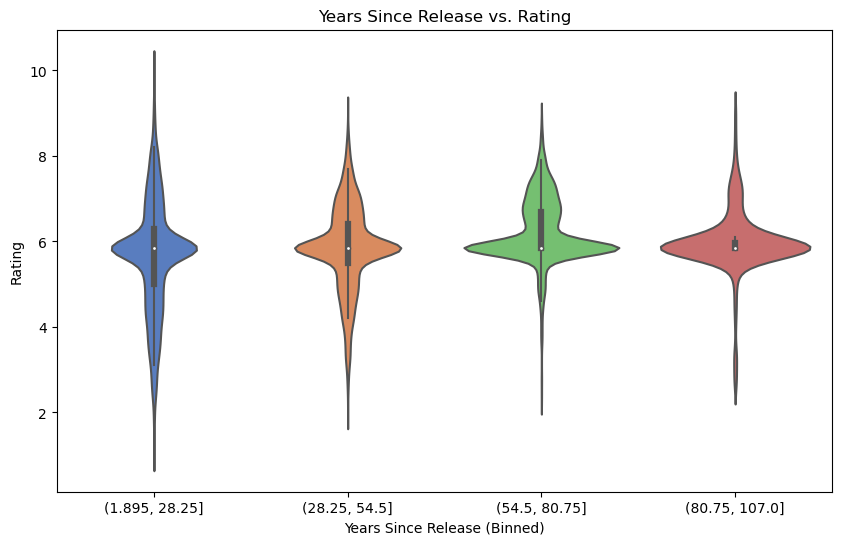

In [118]:
# Convert the time-based feature to categorical if needed (e.g., binning)
movie['Years_Since_Release_Binned'] = pd.cut(movie['Years_Since_Release'], bins=4)

# Create a violin plot for the time-based feature vs. rating
plt.figure(figsize=(10, 6))
sns.violinplot(x='Years_Since_Release_Binned', y='Rating', data=movie, palette='muted')
plt.title('Years Since Release vs. Rating')
plt.xlabel('Years Since Release (Binned)')
plt.ylabel('Rating')
plt.show()

# MODEL TRANING

In [81]:
#Encode Categorical Variables and Split the Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
movie['Genre_encoded'] = label_encoder.fit_transform(movie['Genre'])
movie['Director_encoded'] = label_encoder.fit_transform(movie['Director'])
movie['Actor_encoded'] = label_encoder.fit_transform(movie['Actor 1'])

# Define features (X) and target (y)
X = movie[['Genre_encoded', 'Director_encoded', 'Actor_encoded', 'Year']]
y = movie['Rating']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PERFORMANCE EVALUATION

In [120]:
#Train a Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean absolute Error: {mse}")
print(f"R-squared: {r2}")

Mean absolute Error: 1.2270667150448054
R-squared: 0.014765569307763404


In [83]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")

Random Forest Mean Squared Error: 1.1758767778737698
Random Forest R-squared: 0.05586691122138132


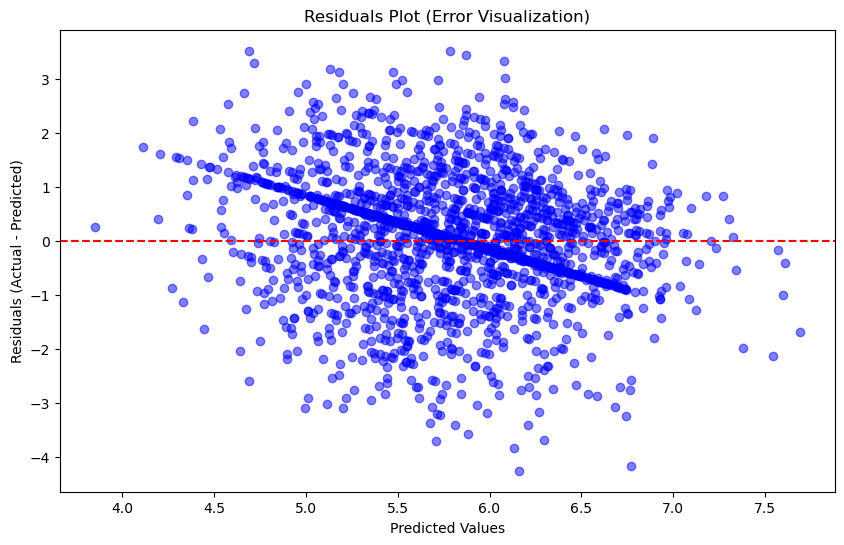

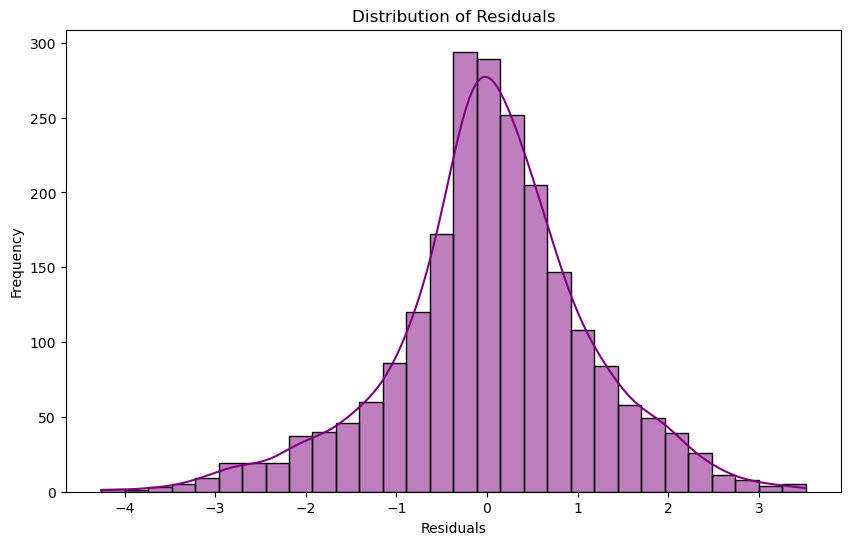

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals (errors)
residuals = y_test - y_rf_pred

# Plot the residuals against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_rf_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')

# Add labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot (Error Visualization)")

# Display the plot
plt.show()

# Optional: Plot the distribution of residuals to see how errors are spread
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Display the plot
plt.show()

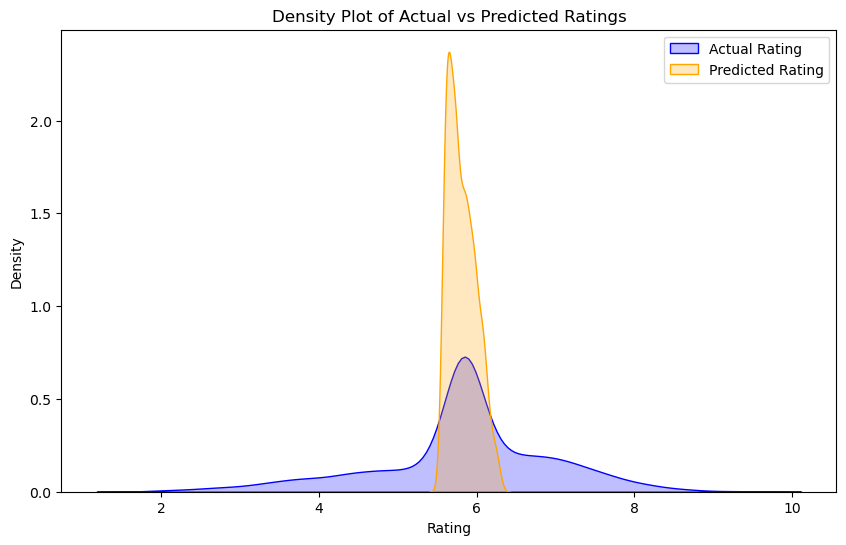

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KDE plot for actual and predicted ratings
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='blue', shade=True, label='Actual Rating')
sns.kdeplot(y_pred, color='orange', shade=True, label='Predicted Rating')

# Add labels and title
plt.xlabel("Rating")
plt.ylabel("Density")
plt.title("Density Plot of Actual vs Predicted Ratings")

# Add a legend
plt.legend()

# Show the plot
plt.show()

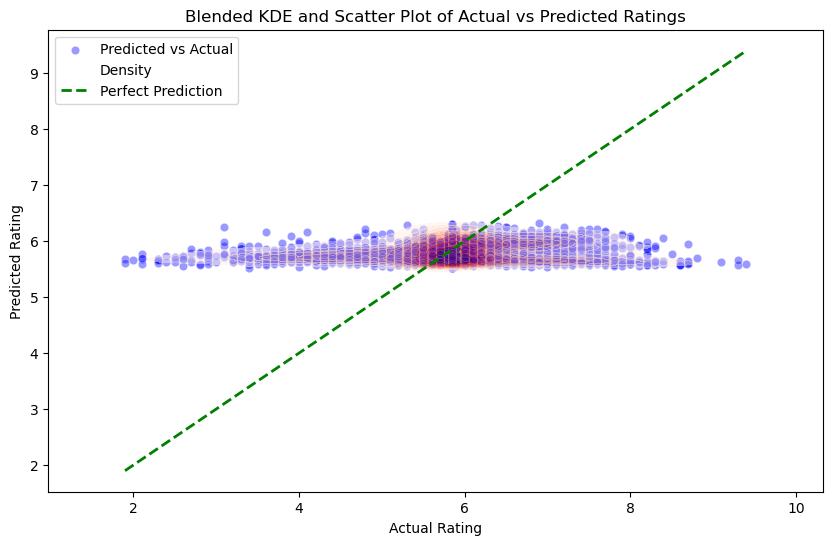

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots: one for scatter, one for KDE
plt.figure(figsize=(10, 6))

# Plot the scatter plot
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.4, label='Predicted vs Actual')

# Overlay a KDE plot to show the density
sns.kdeplot(x=y_test, y=y_pred, cmap='Reds', fill=True, thresh=0.05, alpha=0.5, label='Density')

# Plot a reference line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Blended KDE and Scatter Plot of Actual vs Predicted Ratings")

# Add a legend
plt.legend()

# Show the plot
plt.show()


# 🚀 Conclusion

The task at hand was successful in creating a model that can reasonably forecast movie ratings. Further enhancements to the model were guided by the insightful insights offered by the diagnostic plots and visualizations, which highlighted its strengths and flaws. In order to create a reliable machine learning model, this research highlights the significance of meticulous feature engineering, in-depth data analysis, and cautious model evaluation.